In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

Valor de E (Newton) el 1 de abril de 1986: -0.06526511
Valor de E (Secante) el 1 de abril de 1986: -0.06526511


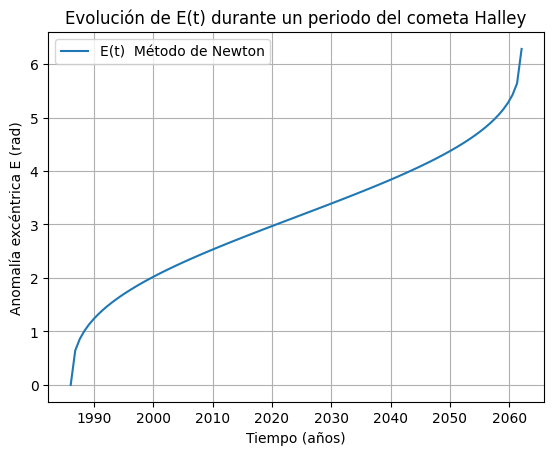

In [3]:
# Punto 1
# Parámetros del cometa Halley
e = 0.9672671  # excentricidad
T = 75.96000 # período en años
t0 = 1986.1113  # fecha del perihelio
t_april_1 = 1986 + 31/365 #1 de abril de 1986

# Función de Kepler: f(E) = E - e*sin(E) - M
def kepler_func(E, M, e):
    return E - e * np.sin(E) - M

# Derivada para Newton: f'(E) = 1 - e*cos(E)
def kepler_func_prime(E, e):
    return 1 - e * np.cos(E)

# Método de Newton
def newton_method(M, e, E0=0, tol=1e-8, max_iter=100):
    E = E0
    for _ in range(max_iter):
        f = kepler_func(E, M, e)
        df = kepler_func_prime(E, e)
        E_next = E - f / df
        if abs(E_next - E) < tol:
            return E_next
        E = E_next
    raise RuntimeError("Newton no converge")

# Método de la secante
def secant_method(M, e, E0=0, E1=1, tol=1e-8, max_iter=100):
    for _ in range(max_iter):
        f0 = kepler_func(E0, M, e)
        f1 = kepler_func(E1, M, e)
        E_next = E1 - f1 * (E1 - E0) / (f1 - f0)
        if abs(E_next - E1) < tol:
            return E_next
        E0, E1 = E1, E_next
    raise RuntimeError("Secante no converge")

# Anomalía media para el 1 de abril de 1986
M_april = 2 * np.pi / T * (t_april_1 - t0)

# Resolver con ambos métodos
E_newton = newton_method(M_april, e)
E_secante = secant_method(M_april, e)

print(f"Valor de E (Newton) el 1 de abril de 1986: {E_newton:.8f}")
print(f"Valor de E (Secante) el 1 de abril de 1986: {E_secante:.8f}")

# Rango de tiempo para un periodo
n = 100
t_vals = np.linspace(t0, t0 + T, n)
M_vals = 2 * np.pi / T * (t_vals - t0)

# Calcular E(t) usando Newton
E_vals = np.array([newton_method(M, e, E0 = M) for M in M_vals])
plt.plot(t_vals, E_vals, label='E(t)  Método de Newton')
plt.xlabel("Tiempo (años)")
plt.ylabel("Anomalía excéntrica E (rad)")
plt.title("Evolución de E(t) durante un periodo del cometa Halley")
plt.grid()
plt.legend()
plt.show()


Método de Secante: m = 0.9575
Newton-Raphson: m = 0.9575
Método de Punto Fijo: m = 0.9575


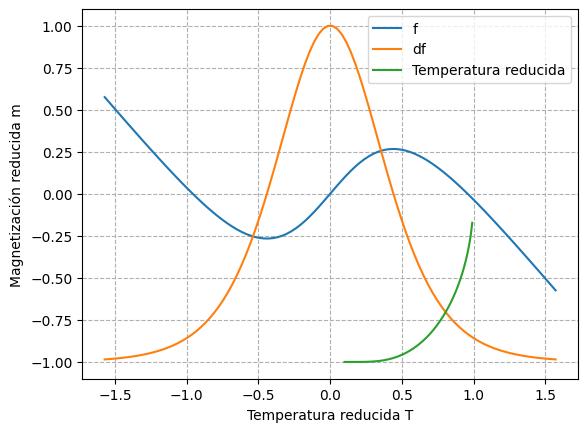

In [63]:
# Punto 2

T= 0.5
f = lambda m: np.tanh(m/T) - m # Funcion
df = lambda m: (1/T) * ((1/np.cosh(m/T))**2) - 1

raiz_secante = newton(f, x0=0.5, x1=0.6)
print(f'Método de Secante: m = {raiz_secante:.4f}')

raiz_newton = newton(f, x0=0.5, fprime=df)
print(f'Newton-Raphson: m = {raiz_newton:.4f}')

# Grafico
x = np.linspace(-np.pi/2, np.pi/2, 100)
y = f(x)
dy = df(x)
plt.plot(x, y, label="f")
plt.plot(x, dy, label="df")
plt.grid()

# Metodo de punto fijo
p = lambda m: np.tanh(m / T)  # m = f(m)
def punto_fijo(p, x0, tol=1e-10, max_iter=100):
  for i in range(max_iter):
    x1 = p(x0)
    if abs(x1 - x0) < tol:
      return x1
    x0 = x1
  raise RuntimeError('Se alcanzo el maximo de iteraciones')

m_punto_fijo = punto_fijo(p, x0=0.5)
print(f'Método de Punto Fijo: m = {m_punto_fijo:.4f}')

# Grafico de raices para cada T

T_values = np.linspace(0.1 , 0.99 , 100)
raices = []
for T in T_values:
  raices.append(newton(f, -1, x1=-0.5))

plt.plot(T_values, raices, label="Temperatura reducida")
plt.xlabel('Temperatura reducida T')
plt.ylabel('Magnetización reducida m')
plt.grid(ls= "--")
plt.legend()
plt.show()

In [12]:
#Punto 3

R = 8.314 #J/K
T_0 = 4.444 # J/K
G = -1e5 #J

f = lambda t: G + R*t*np.log((t/T_0)**(5/2))
T_f = newton(f, 800, x1=1000)

print(f'El valor de T para el cual G = -10^5 es: {T_f:.3f}')

El valor de T para el cual G = -10^5 es: 904.974


<ipython-input-58-ea23a1b6f24e>:5: RuntimeWarning: invalid value encountered in scalar divide
  I = lambda x: np.where(x == 0, 1, (np.sin(x)/x)**2)
<ipython-input-58-ea23a1b6f24e>:6: RuntimeWarning: divide by zero encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I_0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)
<ipython-input-58-ea23a1b6f24e>:6: RuntimeWarning: invalid value encountered in scalar divide
  dI = lambda x: np.where(x == 0, 0, (2*I_0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)


El valor de x donde I(x) = I_0 / 2 es: 1.3915573782515098
Los maximos locales en el intervalo [-10, 10] son: 
(np.float64(-7.725251836937707), np.float64(-4.493409457909064), np.float64(0.0), np.float64(4.493409457908971), np.float64(7.725251836937707))

Las raices de dI son:

x = -9.424778511364766
x = -7.725252418905656
x = -6.283185933571968
x = -4.49340946317909
x = -3.1415927176760157
x = -3.7239101087752467e-11
x = 3.1415930976944253
x = 4.493409520156242
x = 6.283186141156745
x = 7.725251845192555
x = 9.424778446129796


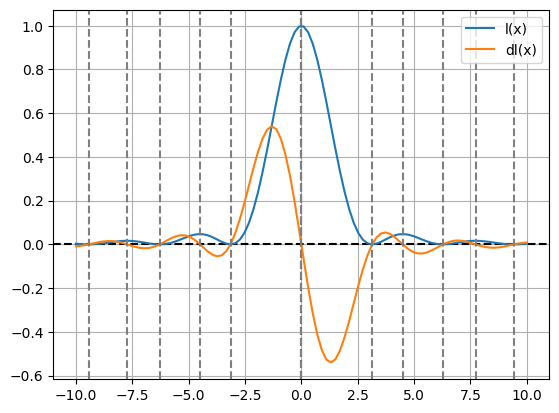

In [58]:
#Punto 4

I_0 = 1
#Funciones del problema
I = lambda x: np.where(x == 0, 1, (np.sin(x)/x)**2)
dI = lambda x: np.where(x == 0, 0, (2*I_0/x) * (np.cos(x) - np.sin(x)/x) * np.sin(x)/x)
#np.where para evitar las indeterminaciones dentro de las funciones


x = np.linspace(-10, 10, 100)
y = I(x)
dy = dI(x)

plt.axhline(color= 'black', linestyle= '--')
plt.axvline(color= 'black', linestyle= '--')
plt.plot(x, y, label="l(x)")
plt.plot(x, dy, label="dl(x)")
plt.legend()
plt.grid()

#Funcion I(x) = I_0/2
f = lambda x: I(x) - I_0/2
raiz = newton(f, np.pi, x1= 0)
print(f'El valor de x donde I(x) = I_0 / 2 es: {raiz}')

#Maximos locales dentro de la función
maximos = newton(dI, -8, x1=-7), newton(dI, -4.5, x1= -5), newton(dI, -1, x1= 1), newton(dI, 4, x1= 5), newton(dI, 7, x1= 8)
print(f'Los maximos locales en el intervalo [-10, 10] son: \n{maximos}\n') #Nos bota los valores de x en los cuales se encuentran los máximos locales

#Raices y metodo regula falsi
def regula_falsi(f, a, b, tol= 1e-7, max= 1000):
    if f(a)*f(b) > 0:
        raise RuntimeError('f(a) y f(b) deben tener signos opuestos')

    for n in range(max+1):
        c = (a*f(b) - b*f(a))/(f(b) - f(a))
        if abs(f(c)) < tol:
            return c
        elif f(c)*f(a) < 0:
            b = c
        else:
            a = c
    raise RuntimeError('Maximo de iteraciones alcanzado')

# Se calcula dentro de cada intervalo
h = 0.5
ceros = []
intervalos = np.arange(-10.1, 10.6, h)
print(f'Las raices de dI son:\n')
for i in intervalos:
    dIi = dI(i)
    dIi1 = dI(i+h)
    if dIi*dIi1 < 0:
        print(f'x = {regula_falsi(dI, i, i+h)}')
        ceros.append(regula_falsi(dI, i, i+h))

for ñ in ceros:
    plt.axvline(ñ, linestyle="--", color="gray")


In [53]:
def regula_falsi(f, a, b, tol= 1e-7, max= 1000):
    if f(a)*f(b) > 0:
        raise RuntimeError('f(a) y f(b) deben tener signos opuestos')

    for n in range(max+1):
        c = (a*f(b) - b*f(a))/(f(b) - f(a))
        if abs(f(c)) < tol:
            return c
        elif f(c)*f(a) < 0:
            b = c
        else:
            a = c
    raise RuntimeError('Maximo de iteraciones alcanzado')

#calcular en los intervalos
h = 0.5
raiz = []
intervalos = np.arange(-10.1, 10.6, h)
print(f'Las raices de dI son:\n')
for i in intervalos:
    dIi = dI(i)
    dIi1 = dI(i+h)
    if dIi*dIi1 < 0:
        print(f'x = {regula_falsi(dI, i, i+h)}')
        raiz.append(regula_falsi(dI, i, i+h))

Las raices de dI son:

x = -9.424778511364766
x = -7.725252418905656
x = -6.283185933571968
x = -4.49340946317909
x = -3.1415927176760157
x = -3.7239101087752467e-11
x = 3.1415930976944253
x = 4.493409520156242
x = 6.283186141156745
x = 7.725251845192555
x = 9.424778446129796


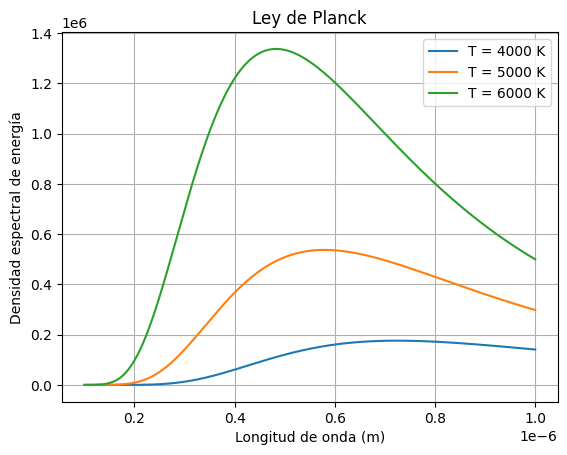

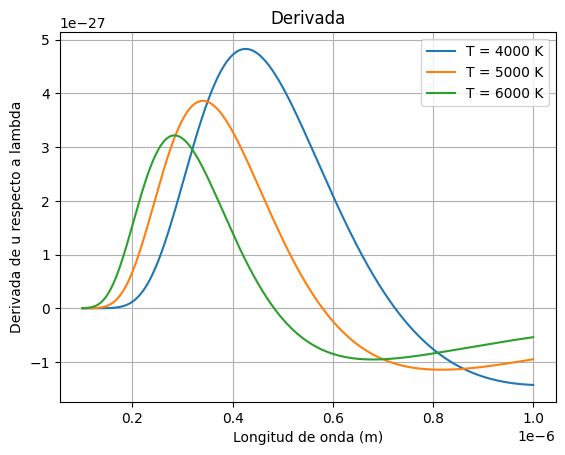

lambda_max (Newton) = 1.030e-07 m
lambda_max (Bisección) = 5.014e-07 m
Verificación de Wien: lambda_max*T = 2.897e-03 
Verificación de Wien: lambda_max*T = 5.952e-04 


In [ ]:
#Punto 5

h = 6.626e-34       # Constante de Planck
c = 2.998e8         # Velocidad de la luz
k_B = 1.381e-23     # Constante de Boltzmann

# Ley de Planck: densidad espectral de energía
def ley_planck(lam, T):
    """
    lam: longitud de onda
    T: temperatura
    Retorna: densidad espectral de energía
    """
    return (8 * np.pi * h * c) / (lam**5 * (np.exp(h * c / (lam * k_B * T)) - 1))

def plack_d(lam, T):
    """
    lam: longitud de onda
    T: temperatura
    Retorna: derivada de u respecto a lambda
    """
    lambda_0 = h * c / (k_B * T)
    x = lam / lambda_0
    # Numerador y denominador de la fórmula dada
    num = 5 * x + (1 - 5 * x) * np.exp(1/x)
    denom = x**7 * (np.exp(1/x) - 1)**2
    K = 8 * np.pi * h * c
    return K * lambda_0 * num / denom

# Rango de longitudes de onda para graficar
lam = np.linspace(1e-7, 1e-6, 1000)  # en metros, se escogen por practicidad

# Temperaturas para graficar
temperaturas = [4000, 5000, 6000]

# Graficar ley de plankc
plt.figure()
for T in temperaturas:
    plt.plot(lam, ley_planck(lam, T), label=f"T = {T} K")
plt.title("Ley de Planck")
plt.xlabel("Longitud de onda (m)")
plt.ylabel("Densidad espectral de energía")
plt.legend()
plt.grid()
plt.show()

# Graficar derivada
plt.figure()
for T in temperaturas:
    plt.plot(lam, plack_d(lam, T), label=f"T = {T} K")
plt.title("Derivada")
plt.xlabel("Longitud de onda (m)")
plt.ylabel("Derivada de u respecto a lambda")
plt.legend()
plt.grid()
plt.show()

# Encontrar lambda_max para T = 5778 K
# Usar método de newton o bisección para resolver derivada = 0
T_1 = 5778  # Temperatura dada

def du_dlambda(lam):
    return plack_d(lam, T_1)

# Método de Newton (valor cercano a la raiz)
max_newton = newton(du_dlambda, x0=1e-7, fprime = None, x1 = 1e-6)
print(f"lambda_max (Newton) = {max_newton:.3e} m")

# Método de bisección (usamos el mismo intervalo de antes)
max_bisect = bisect(du_dlambda, 1e-7, 1e-6)  #
print(f"lambda_max (Bisección) = {max_bisect:.3e} m")

# Verificación de Wien
wien_approx1 = max_bisect * T_1
wien_approx2 = max_newton * T_1

print(f"Verificación de Wien: lambda_max*T = {wien_approx1:.3e} ")
print(f"Verificación de Wien: lambda_max*T = {wien_approx2:.3e} ")  #La de newton no nos da lo que nos indican que daría pero bisección si



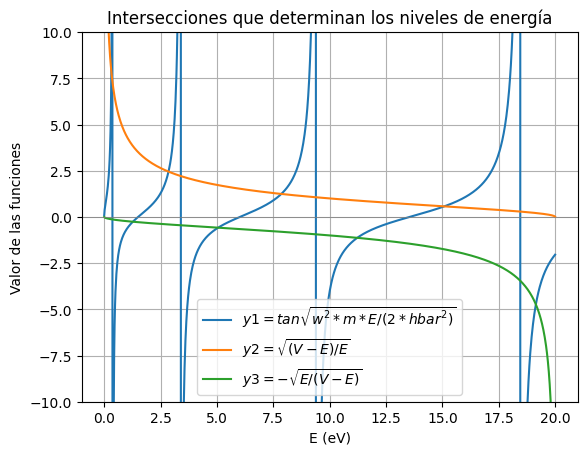

Primeros seis niveles de energía (en eV):
Nivel 0: 0.311 eV
Nivel 1: 0.371 eV
Nivel 2: 0.371 eV
Nivel 3: 1.272 eV
Nivel 4: 2.854 eV
Nivel 5: 3.394 eV


In [48]:
#Punto 6
# Constantes
m = 9.11e-31       # Masa del electrón en kg
hbar = 1.055e-34   # Constante de Planck reducida en J·s
eV = 1.602e-19     # Conversión de eV a J
V = 20 * eV        # Altura del pozo en J (20 eV)
w = 1e-9           # Ancho del pozo en metros (1 nm)

#Funciones y estan en J
def y1(E):
    return np.tan(np.sqrt(w**2 * m * E / (2 * hbar**2)))

def y2(E):
    return np.sqrt((V - E) / E)

def y3(E):
    return -np.sqrt(E / (V - E))

# Rango de energías de 0 a V 20 eV
E_vals = np.linspace(0.001 * eV, (V - 0.001 * eV), 1000)  # evitar dividir por cero
# Evaluamos las funciones
Y1_vals = y1(E_vals)
Y2_vals = y2(E_vals)
Y3_vals = y3(E_vals)
# Graficamos y los valores de E se convierten a eV
plt.figure()
plt.plot(E_vals / eV, Y1_vals, label=r'$y1 = tan\sqrt{w^2*m*E / (2*hbar^2)}$')
plt.plot(E_vals / eV, Y2_vals, label=r'$y2 = \sqrt{(V - E)/E}$')
plt.plot(E_vals / eV, Y3_vals, label=r'$y3 = -\sqrt{E / (V - E)}$')
plt.axhline(0, color='gray', linewidth=0.5)
plt.ylim(-10, 10) # limitamos los valores en y sino el eje y se extiende hasta cantidades muy grandes y daña la vista de la gráfica
plt.xlabel('E (eV)')
plt.ylabel('Valor de las funciones')
plt.title('Intersecciones que determinan los niveles de energía')
plt.legend()
plt.grid()
plt.show()
#Niveles
# Funciones para encontrar las raíces
def f_par(E):
    return np.tan(np.sqrt(w**2 * m * E / (2 * hbar**2))) - np.sqrt((V - E) / E)
def f_impar(E):
    return np.tan(np.sqrt(w**2 * m * E / (2 * hbar**2))) + np.sqrt(E / (V - E))

# Buscar raíces usando bisección
def encontrar_niveles(func, num_niveles):
  """
  func: función establecida
  num_niveles: cantidad de niveles o raices que queremos encontrar
  return: lista de las raices o niveles encontradas
  """
  niveles = []
  E_vals = np.linspace(0.001 * eV, V - 0.001 * eV, 1000)

  for i in range(len(E_vals) - 1):
      a, b = E_vals[i], E_vals[i+1]
      if func(a) * func(b) < 0: # Para garantizar que tiene signos opuestos
        raiz = bisect(func, a, b) # Se utiliza bisección dentro del intervalo establecido
        niveles.append(raiz)
        if len(niveles) >= num_niveles:
          break
  return niveles

# Obtener primeros 3 niveles pares e impares para un total de 6
niveles_pares = encontrar_niveles(f_par, 3)
niveles_impares = encontrar_niveles(f_impar, 3)
# Combinar y ordenar los niveles
niveles = sorted(niveles_pares + niveles_impares)
print("Primeros seis niveles de energía (en eV):")
for i, E in enumerate(niveles):
    print(f"Nivel {i}: {E / eV:.3f} eV") #Se convierte de J a eV

In [25]:
# Punto 7

# Constantes a usar
G = 6.674e-11 # Constante gravitacional
M = 5.974e24 # Masa de la tierra
m = 7.348e22 # Masa de la luna
R = 3.844e8 # Distancia de tierra a luna
w = 2.662e-6 # Velocidad angular

# Funcion f(r) para resolver la distancia r desde la Tierra hasta el punto L1
f = lambda r : (G * M / r**2) - (G * m / (R - r)**2) - (r * w**2)
# Método de la secante
r_1 = newton(f, x0=1e3, x1=1e7)
print(f"Raíz usando método de la secante: r = {r_1:.3e} m")

Raíz usando método de la secante: r = 3.260e+08 m
